In [1]:
from nilearn import datasets, plotting, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import load_img, resample_to_img
import pandas as pd

from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## functions

In [2]:
import pandas as pd

def find_indices_with_term(df, term, columns_to_check):
    """
    Find indices in a DataFrame where the given term appears in any of the specified columns.

    Parameters:
    - df: pandas.DataFrame, the DataFrame to search.
    - term: str, the term to search for.
    - columns_to_check: list, the columns in which to search for the term.

    Returns:
    - list, a list of indices where the term is found.
    """
    # Apply a mask to find the term in the specified columns, case insensitive
    mask = df[columns_to_check].apply(lambda x: x.str.contains(term, case=False, na=False)).any(axis=1)
    
    # Get the indices where the term is found
    indices_with_term = df.index[mask].tolist()
    
    return indices_with_term



# Note: Replace 'labels_df' with the actual DataFrame variable you are using.


## load atlas

In [3]:


# Load the custom atlas NIfTI file
atlas_filename = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_scaffold.nii.gz'
atlas_img = load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Resample your atlas to the same space as the target MNI template
# resampled_atlas_img = resample_to_img(source_img=atlas_img, target_img=target_img, interpolation='nearest')

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_labels.csv'
labels_df = pd.read_csv(labels_csv)



In [6]:
atlas_img.shape

(193, 229, 193, 542)

In [6]:
first_volume_data = atlas_img.get_fdata()[:, :, :, 0]
first_volume_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

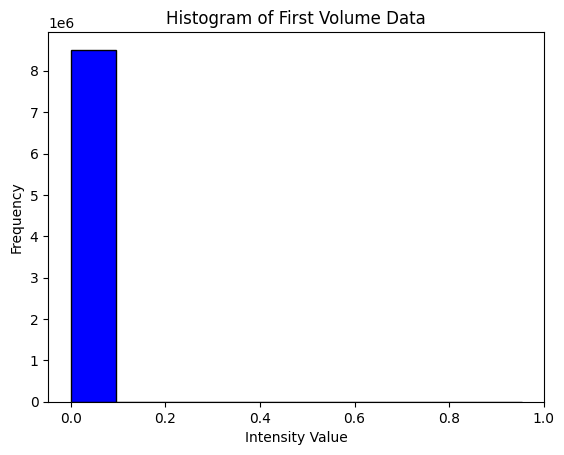

In [13]:
plt.hist(first_volume_data.flatten(), color='blue', edgecolor='black')
plt.title('Histogram of First Volume Data')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

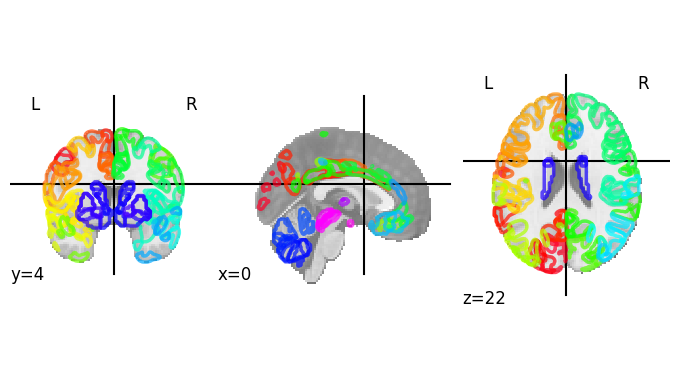

In [9]:
plotting.plot_prob_atlas(atlas_img)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


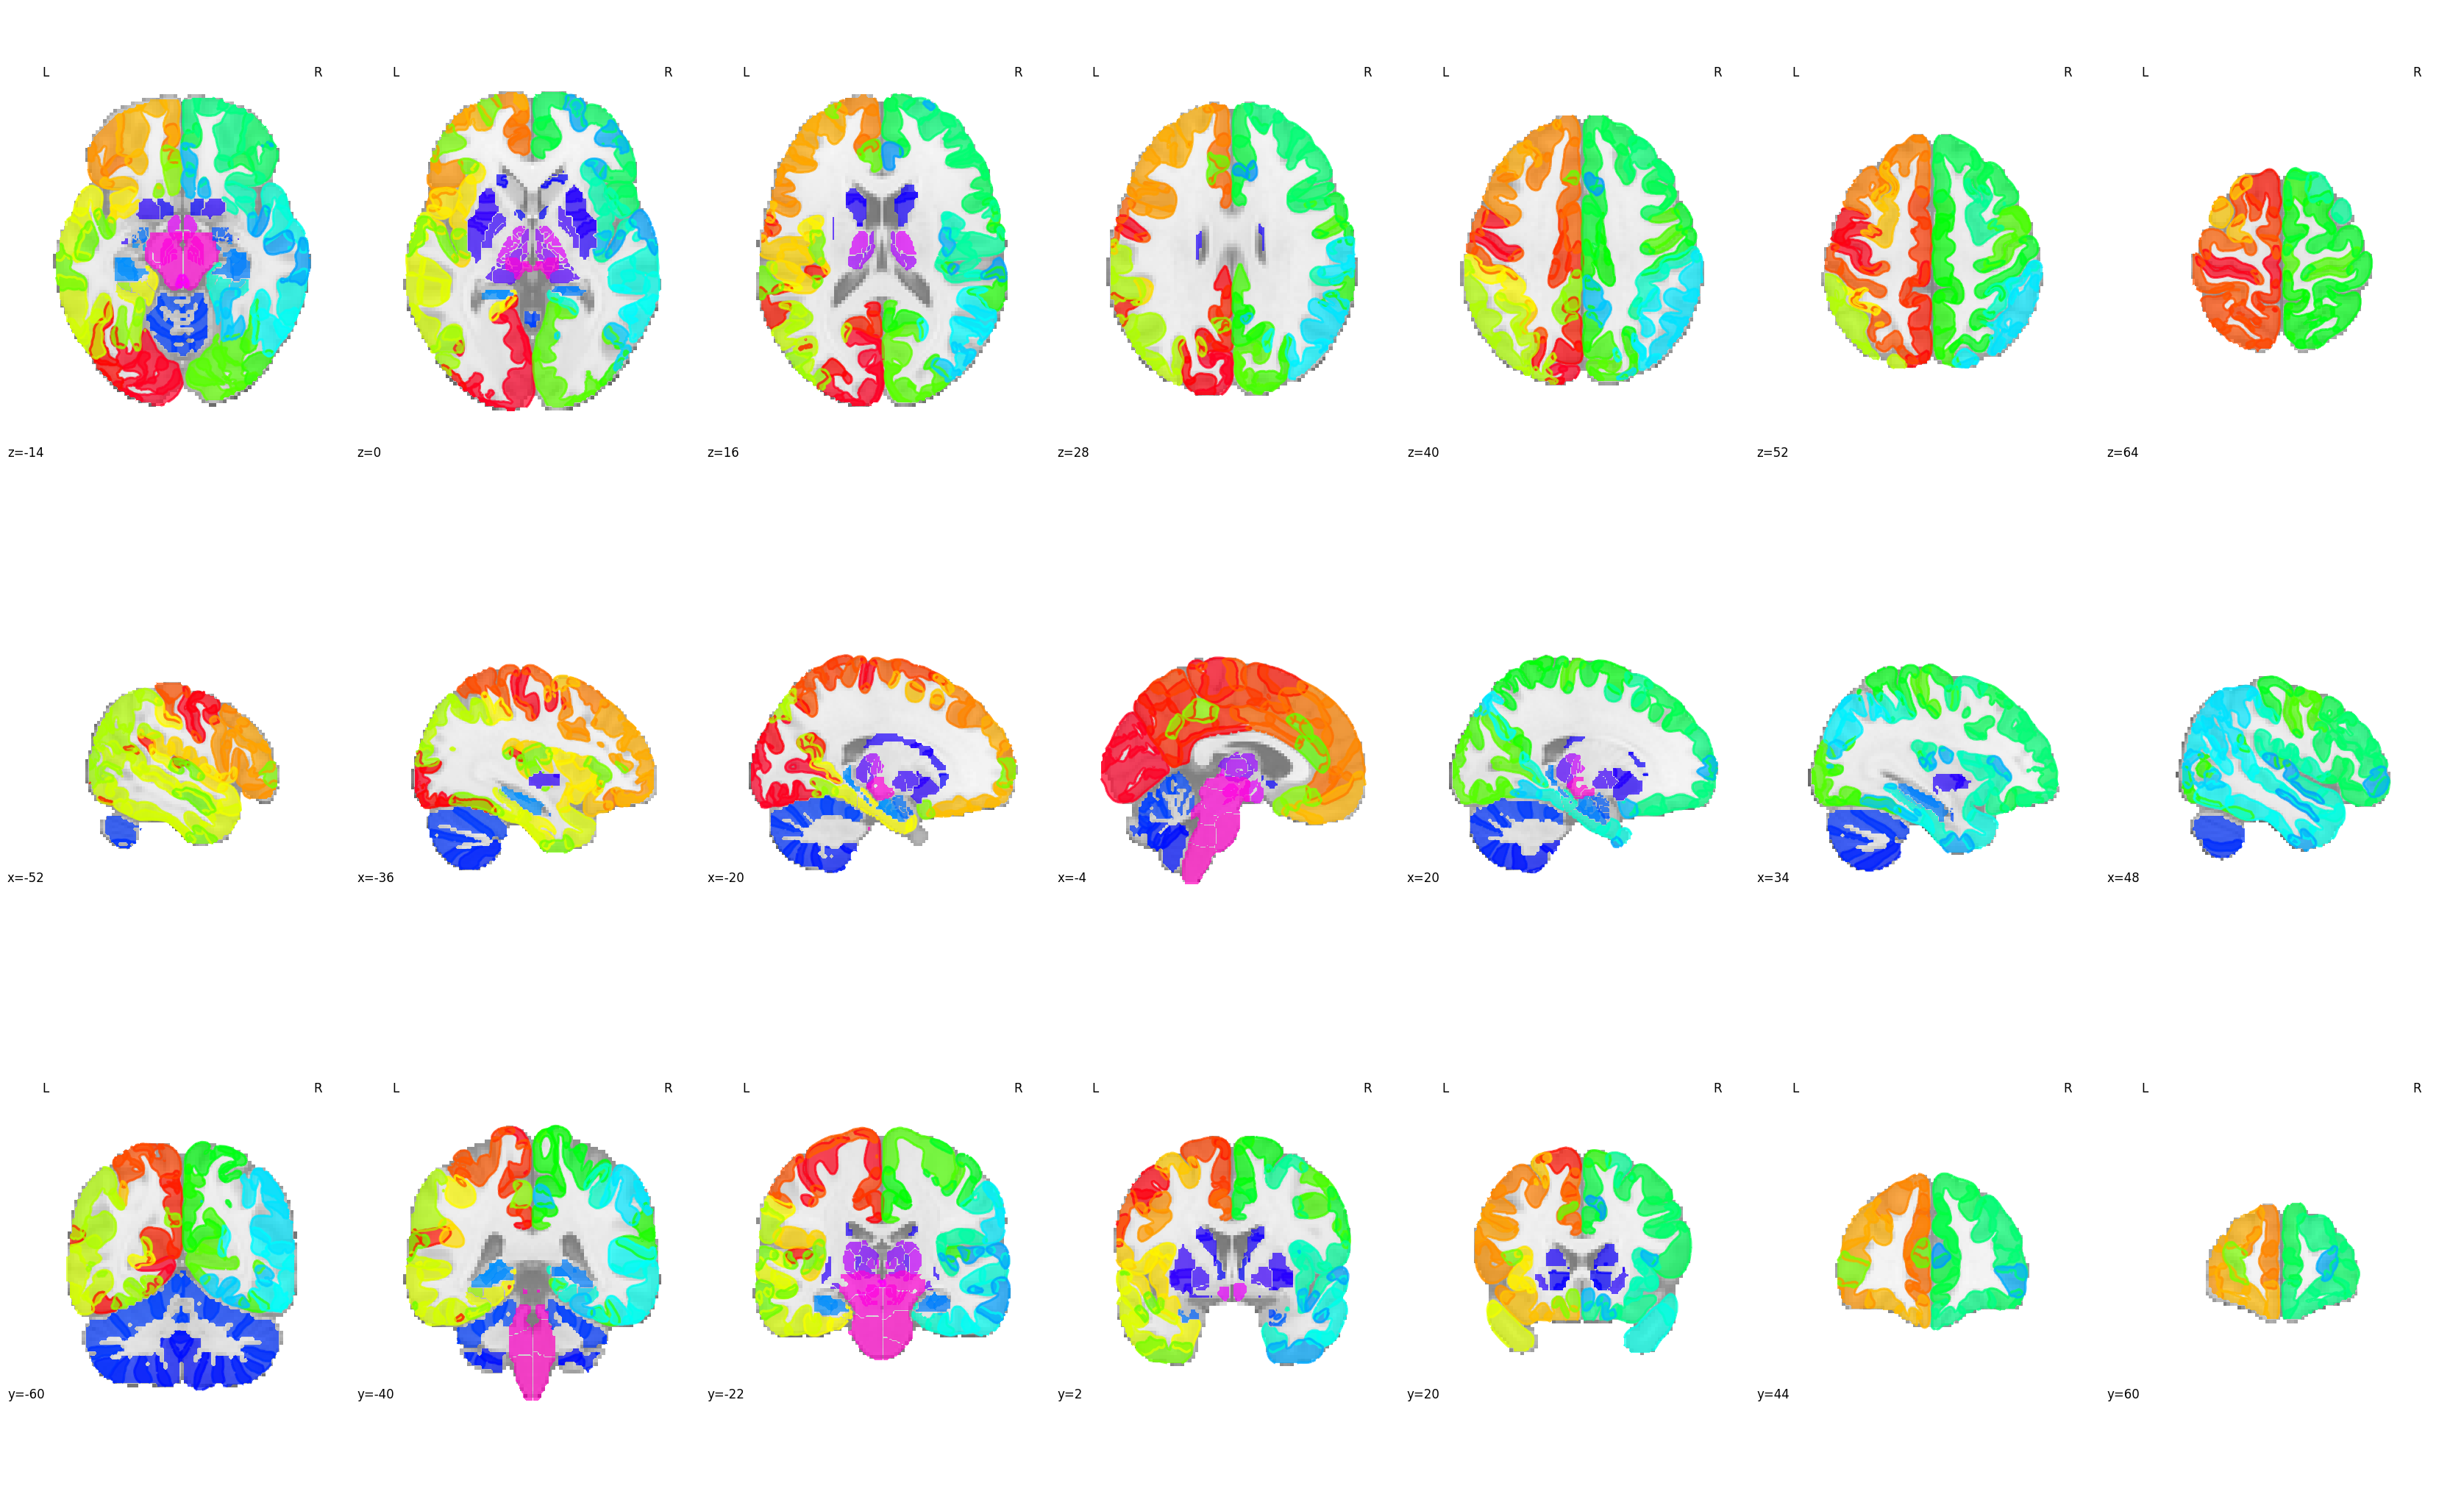

In [10]:
plotting.plot_prob_atlas(atlas_img, view_type="filled_contours", threshold=0.2, display_mode="mosaic", draw_cross=False)

In [3]:
labels_df

,labels,label_descriptions,labels_2,labels_3,labels_4,labels_5
0,Ctx_V1_L,Primary visual cortex (Left),Ctx_V1_L,striate_L,visual_early_L,Glasser2016+Petre2023VolProj
1,Ctx_MST_L,Medial superior temporal area (Left),Ctx_MST_L,dMT+_L,visual_MT+_L,Glasser2016+Petre2023VolProj
2,Ctx_V6_L,sixth visual area (Left),Ctx_V6_L,V6_L,visual_dorsal_L,Glasser2016+Petre2023VolProj
3,Ctx_V2_L,second visual area (Left),Ctx_V2_L,extrastriate_L,visual_early_L,Glasser2016+Petre2023VolProj
4,Ctx_V3_L,third visual area (Left),Ctx_V3_L,extrastriate_L,visual_early_L,Glasser2016+Petre2023VolProj
...,...,...,...,...,...,...
537,Bstem_BStem_Ponsrv_R,Pons right rostral ventral,Shen_Pons_Rrv,Shen_Pons_Rrv,Pons_R,Shen268
538,Bstem_BStem_Ponscv_R,Pons right caudal ventral,Shen_Pons_Rcv,Shen_Pons_Rcv,Pons_R,Shen268
539,Bstem_BStem_Ponscd_R,Pons right caudal dorsal,Shen_Pons_Rcd,Shen_Pons_Rcd,Pons_R,Shen268
540,Bstem_BStem_Med_L,Medulla left,Shen_Med_L,Shen_Med_L,Medulla_L,Shen268


## subset medulla


In [18]:

columns_to_check = ['labels_4']
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


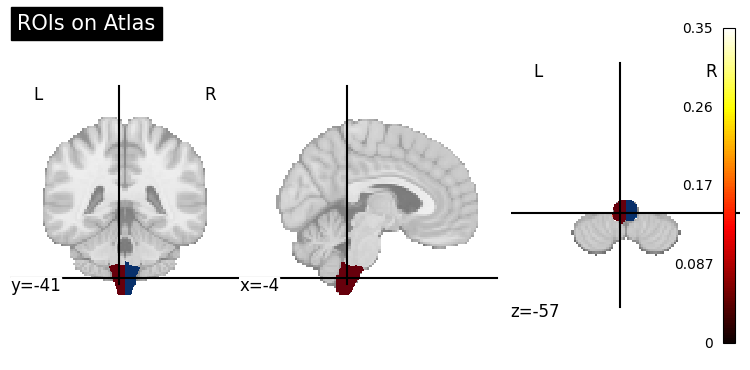

In [28]:
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)
display = plotting.plot_stat_map(image.index_img(atlas_img, indices_with_medulla[0]), title="ROIs on Atlas")

num_indices = len(indices_with_medulla)

# Generate a list of colormaps
# Here we use a simple approach to select from a set of colormaps
available_cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']
# Ensure we have enough colormaps, repeat the list if necessary
cmaps = available_cmaps * (num_indices // len(available_cmaps) + 1)

# Loop through the indices and plot each ROI with a unique colormap
for index, cmap in zip(indices_with_medulla, cmaps[:num_indices]):
    roi_img = image.index_img(atlas_img, index)
    display.add_overlay(roi_img, cmap=cmap)

# Show the plot
plotting.show()


In [ ]:
len(cm.batlow)

In [19]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)

In [21]:
insula_atlas.shape

(193, 229, 193, 26)

## insula

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


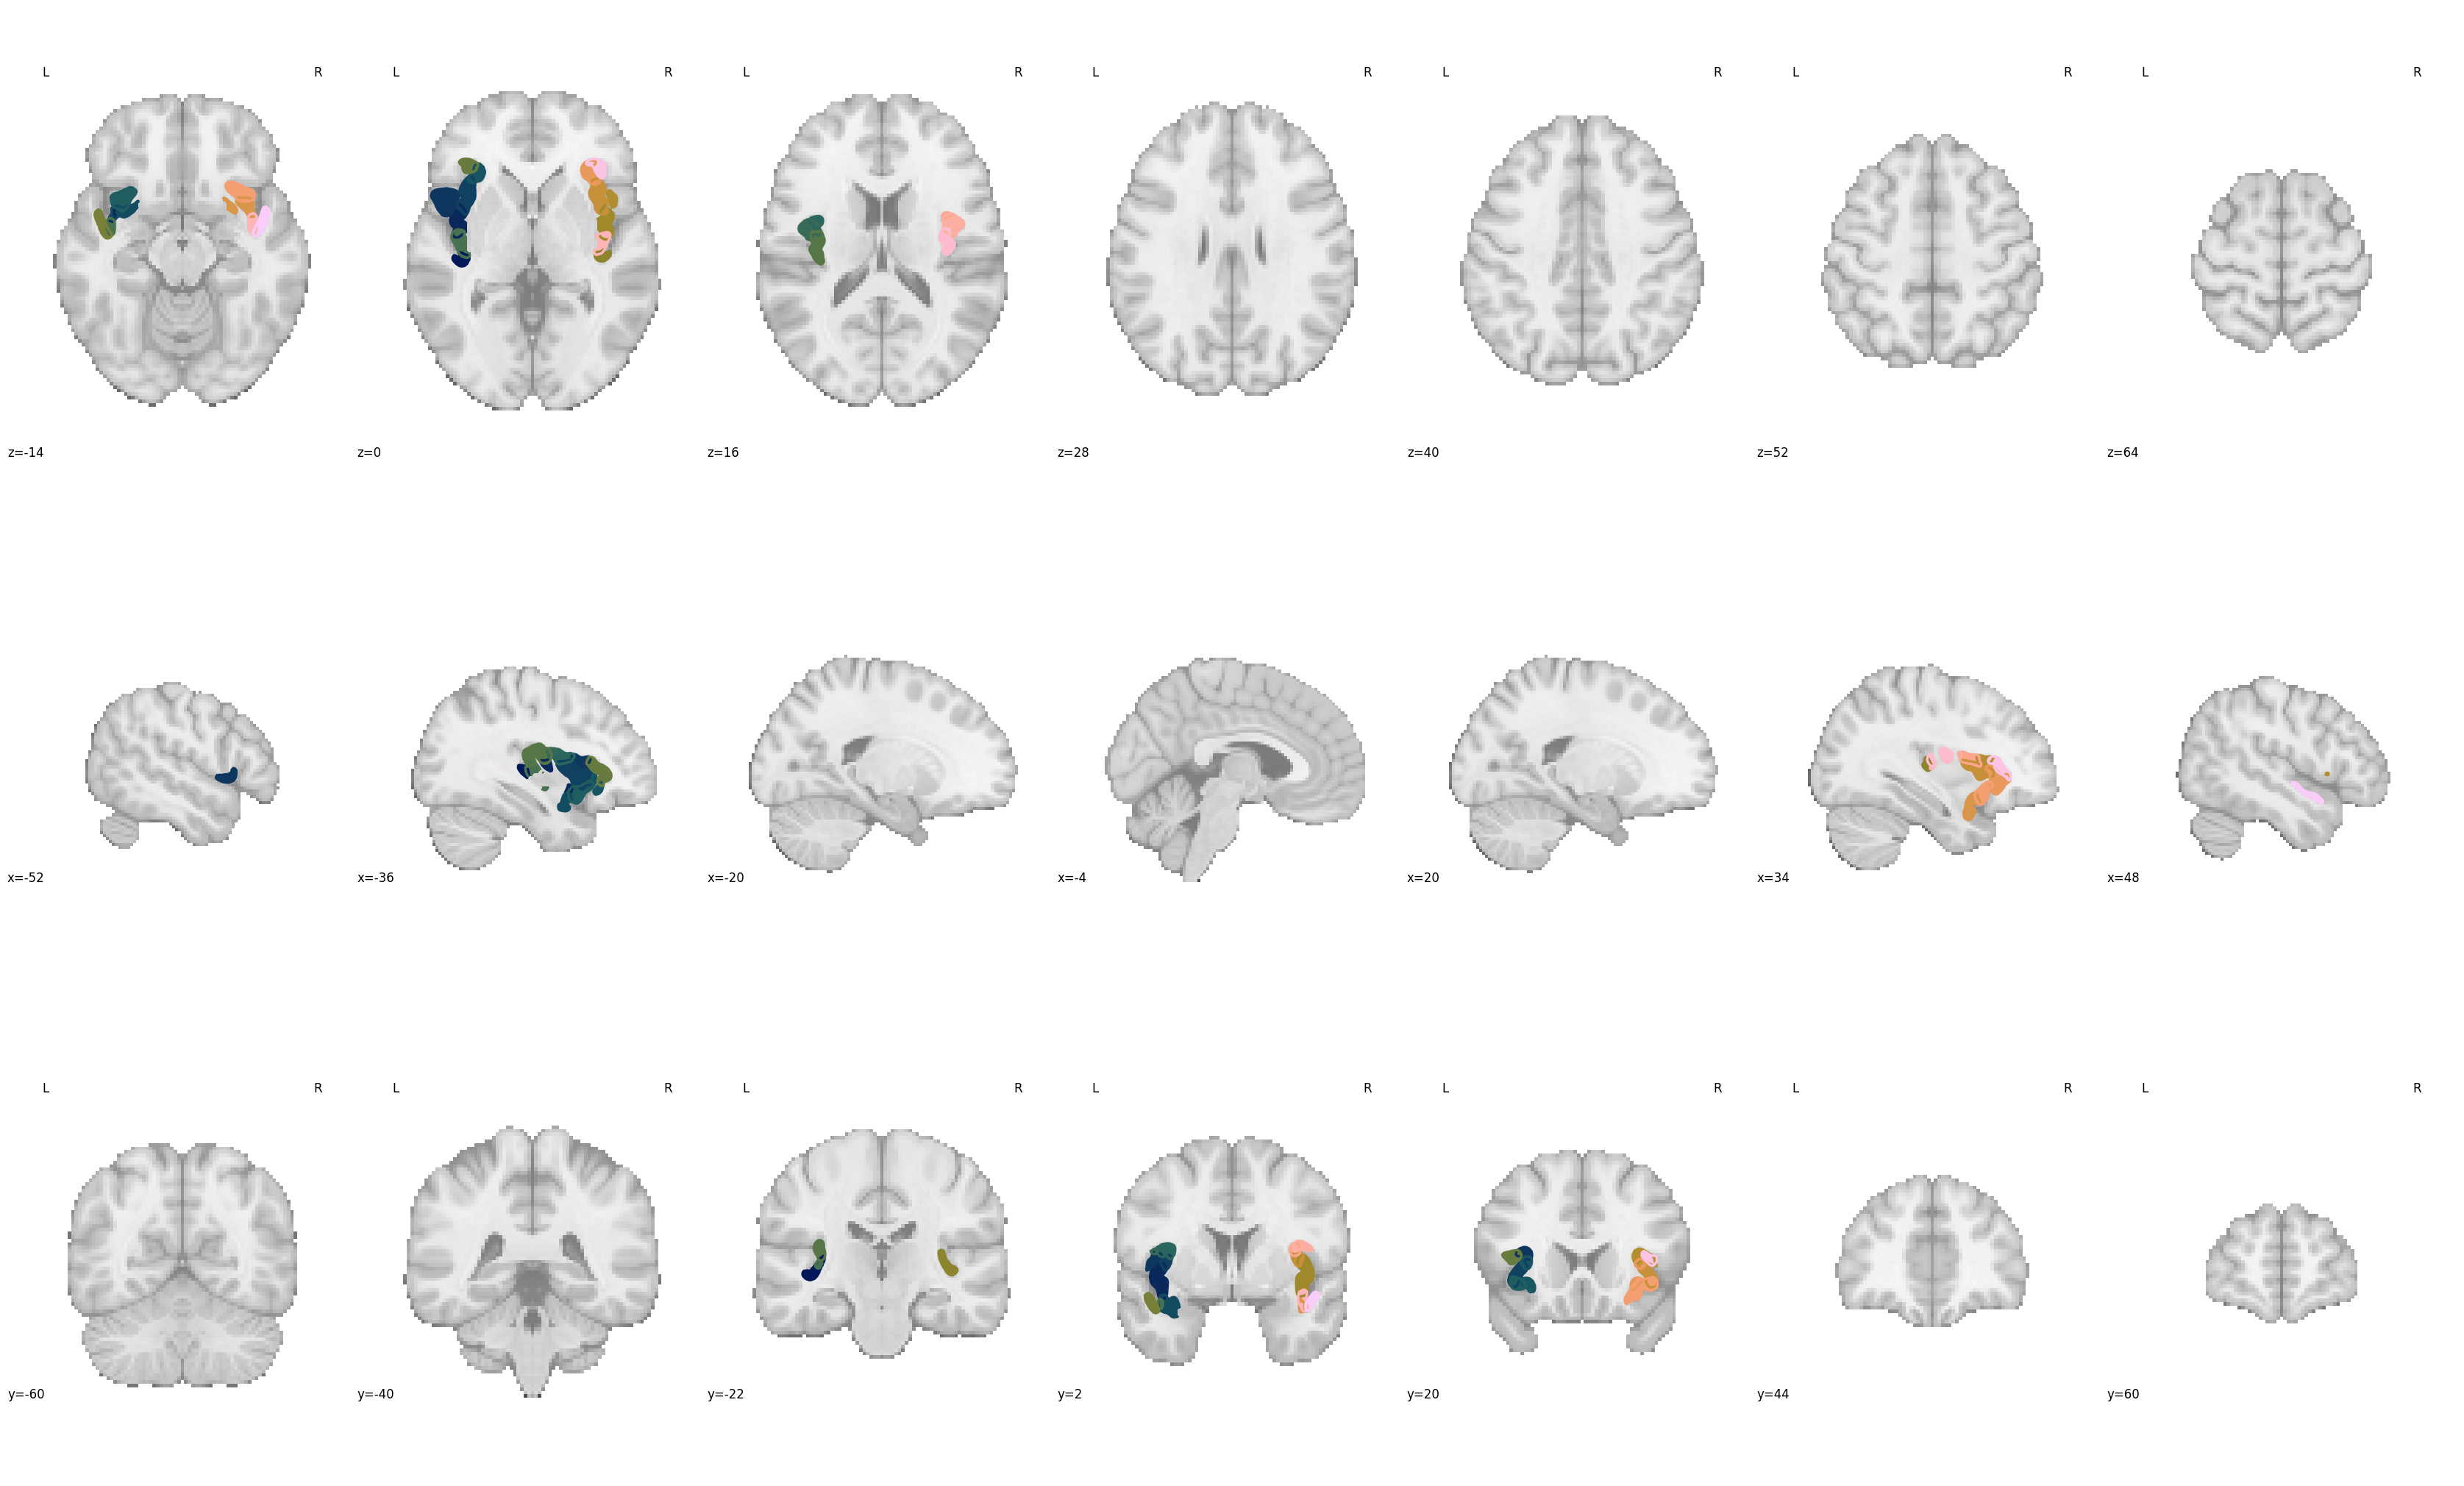

In [23]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)
plotting.plot_prob_atlas(insula_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


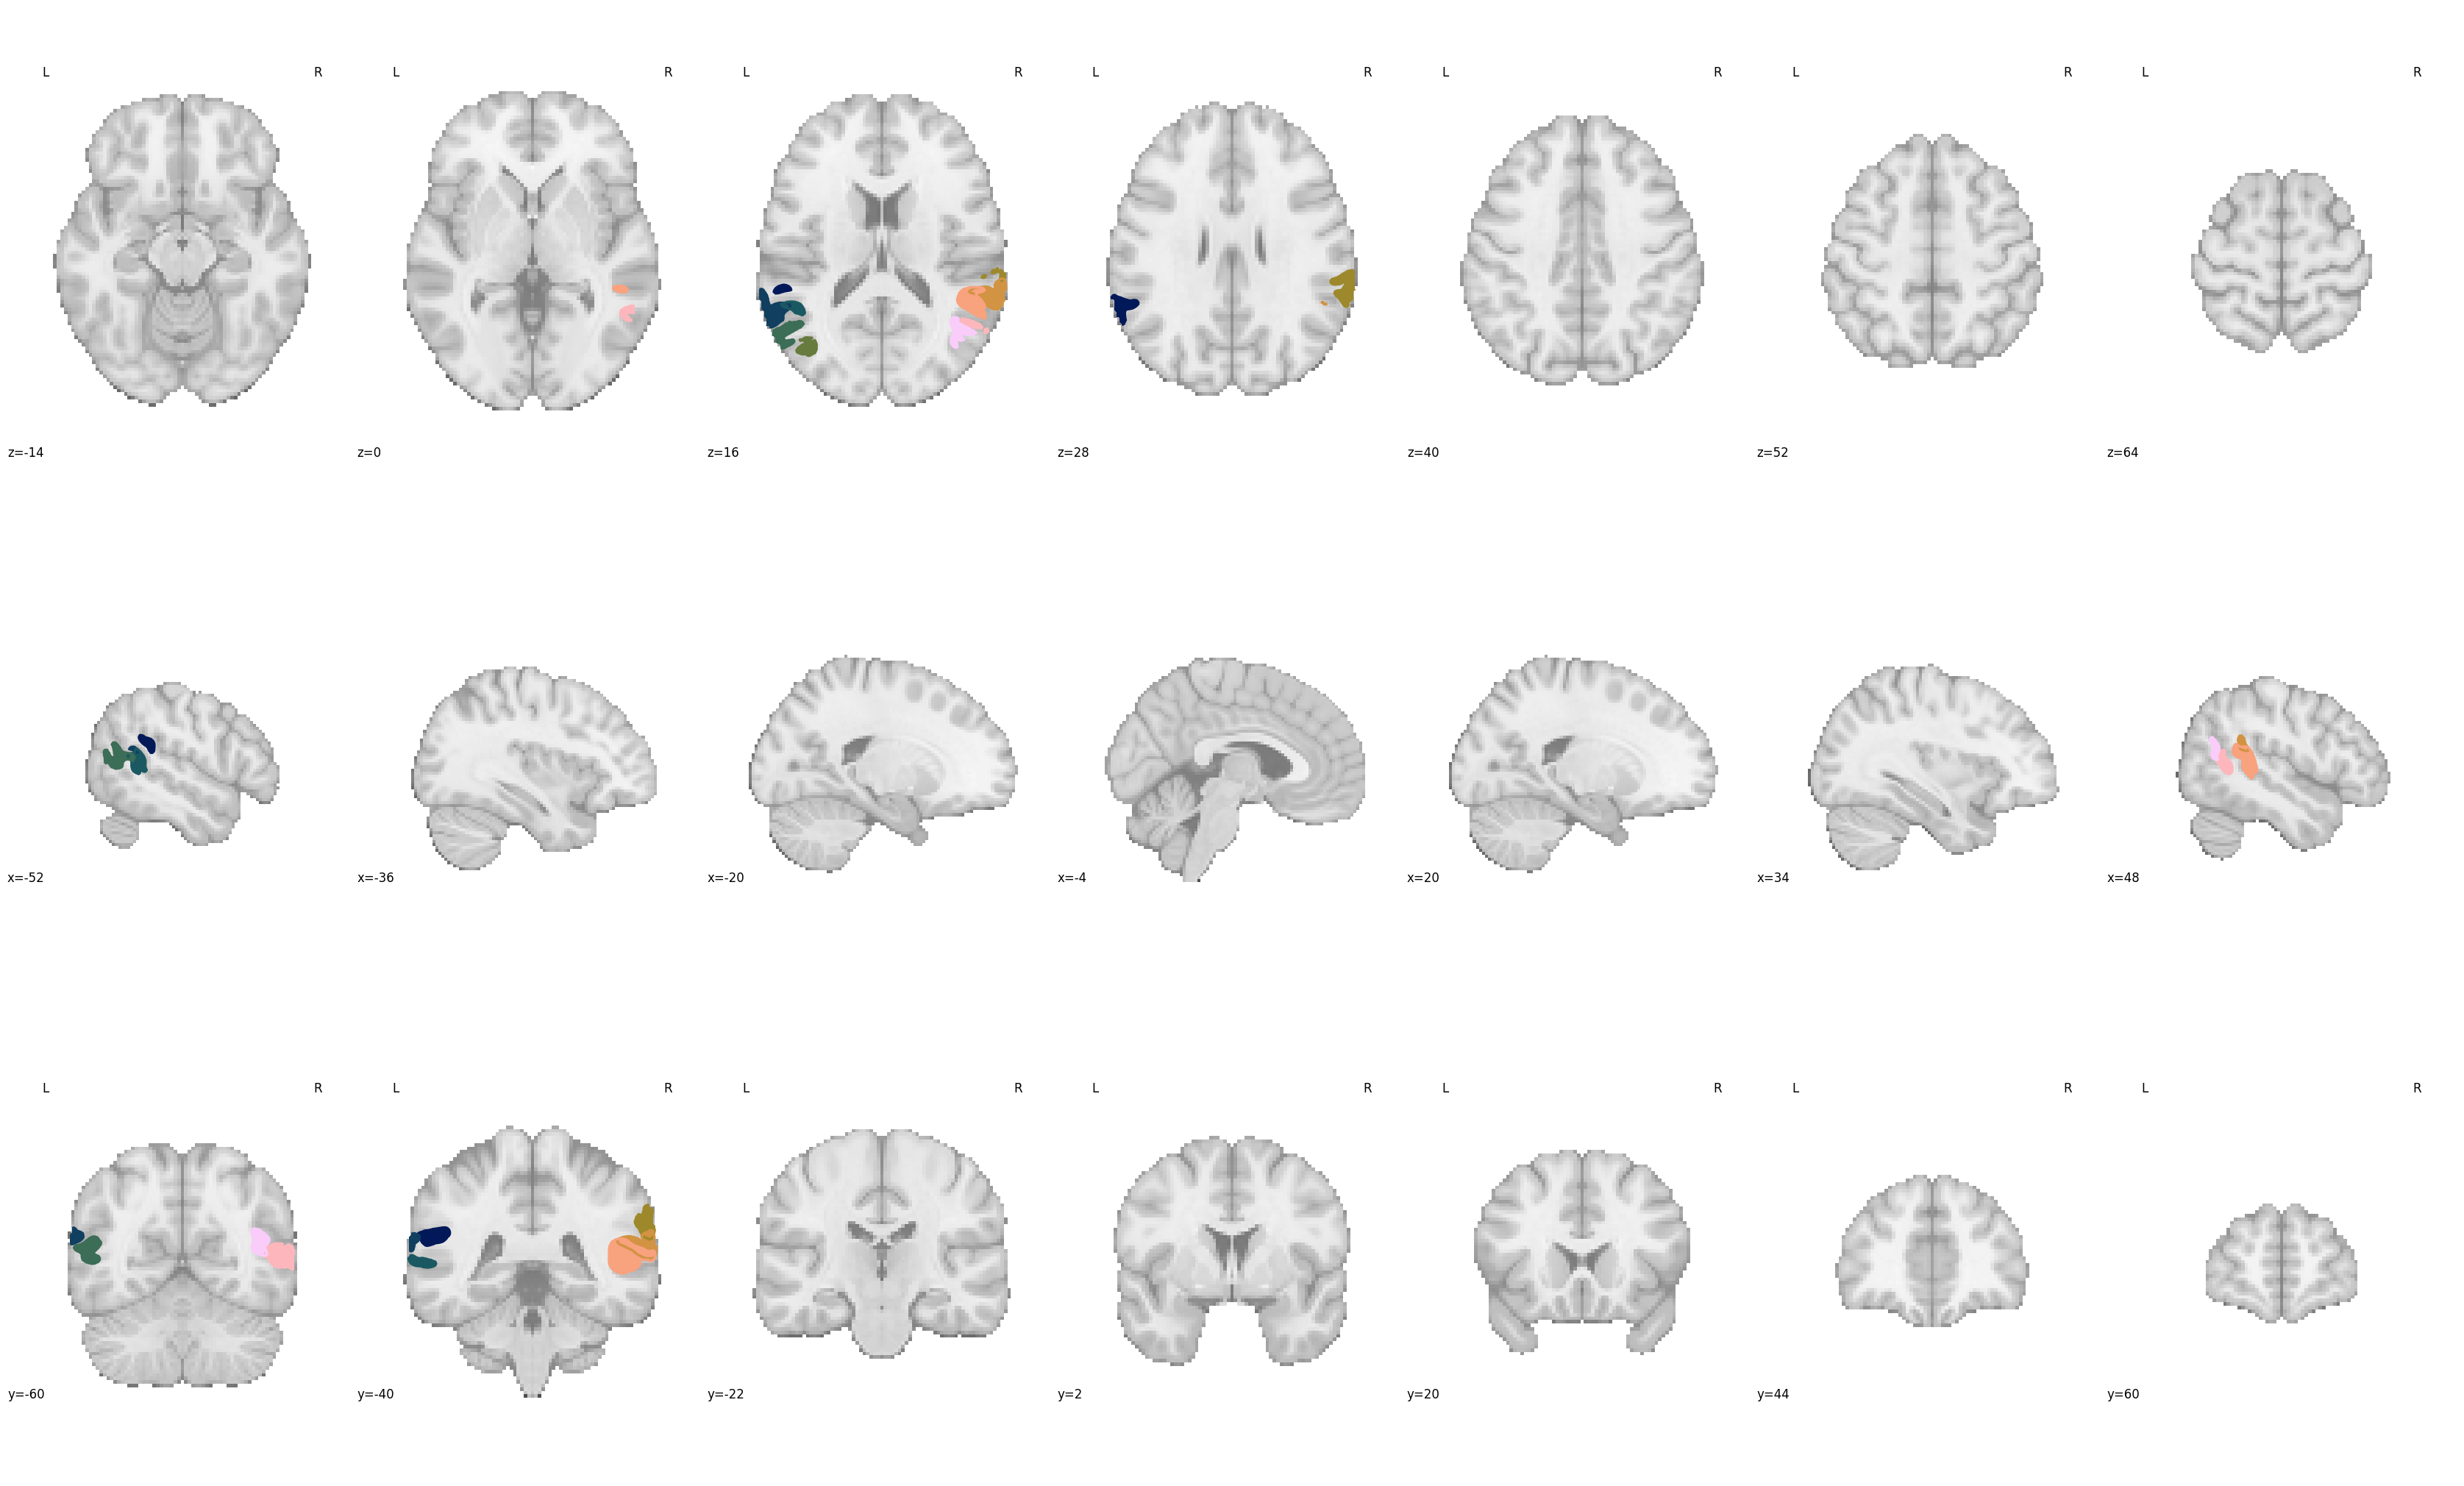

In [25]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


In [33]:
# labels_df['labels_4'].unique().tolist()

unique_values_ignoring_lr = labels_df['labels_4'].str.replace('_L', '').str.replace('_R', '').unique().tolist()

len(unique_values_ignoring_lr)

unique_values_ignoring_lr

['visual_early',
 'visual_MT+',
 'visual_dorsal',
 'visual_ventral',
 'somatomotor_primary',
 'somatomotor_premotor',
 'cingulate_posterior',
 'auditory_early',
 'parietal_TPOJ',
 'cingulate_dlPFC',
 'parietal_superior_lobule',
 'somatomotor_paracentral_lobule',
 'cingulate_ACC_mPFC',
 'cingulate_ventral_frontal',
 'cingulate_vlPFC',
 'somatomotor_operculum',
 'insula_posterior',
 'auditory_association_cortex',
 'insula_operculum',
 'insula_anterior',
 'parietal_inferior_lobule',
 'temporal_medial',
 'temporal_lateral',
 'Hippocampal_Formation',
 'Amygdala',
 'cerebellar_cortex',
 'vermis',
 'VStriatum',
 'CAU',
 'PUT',
 'GP',
 'Thalamus',
 'Midbrain',
 'Pons',
 'Medulla']

In [ ]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


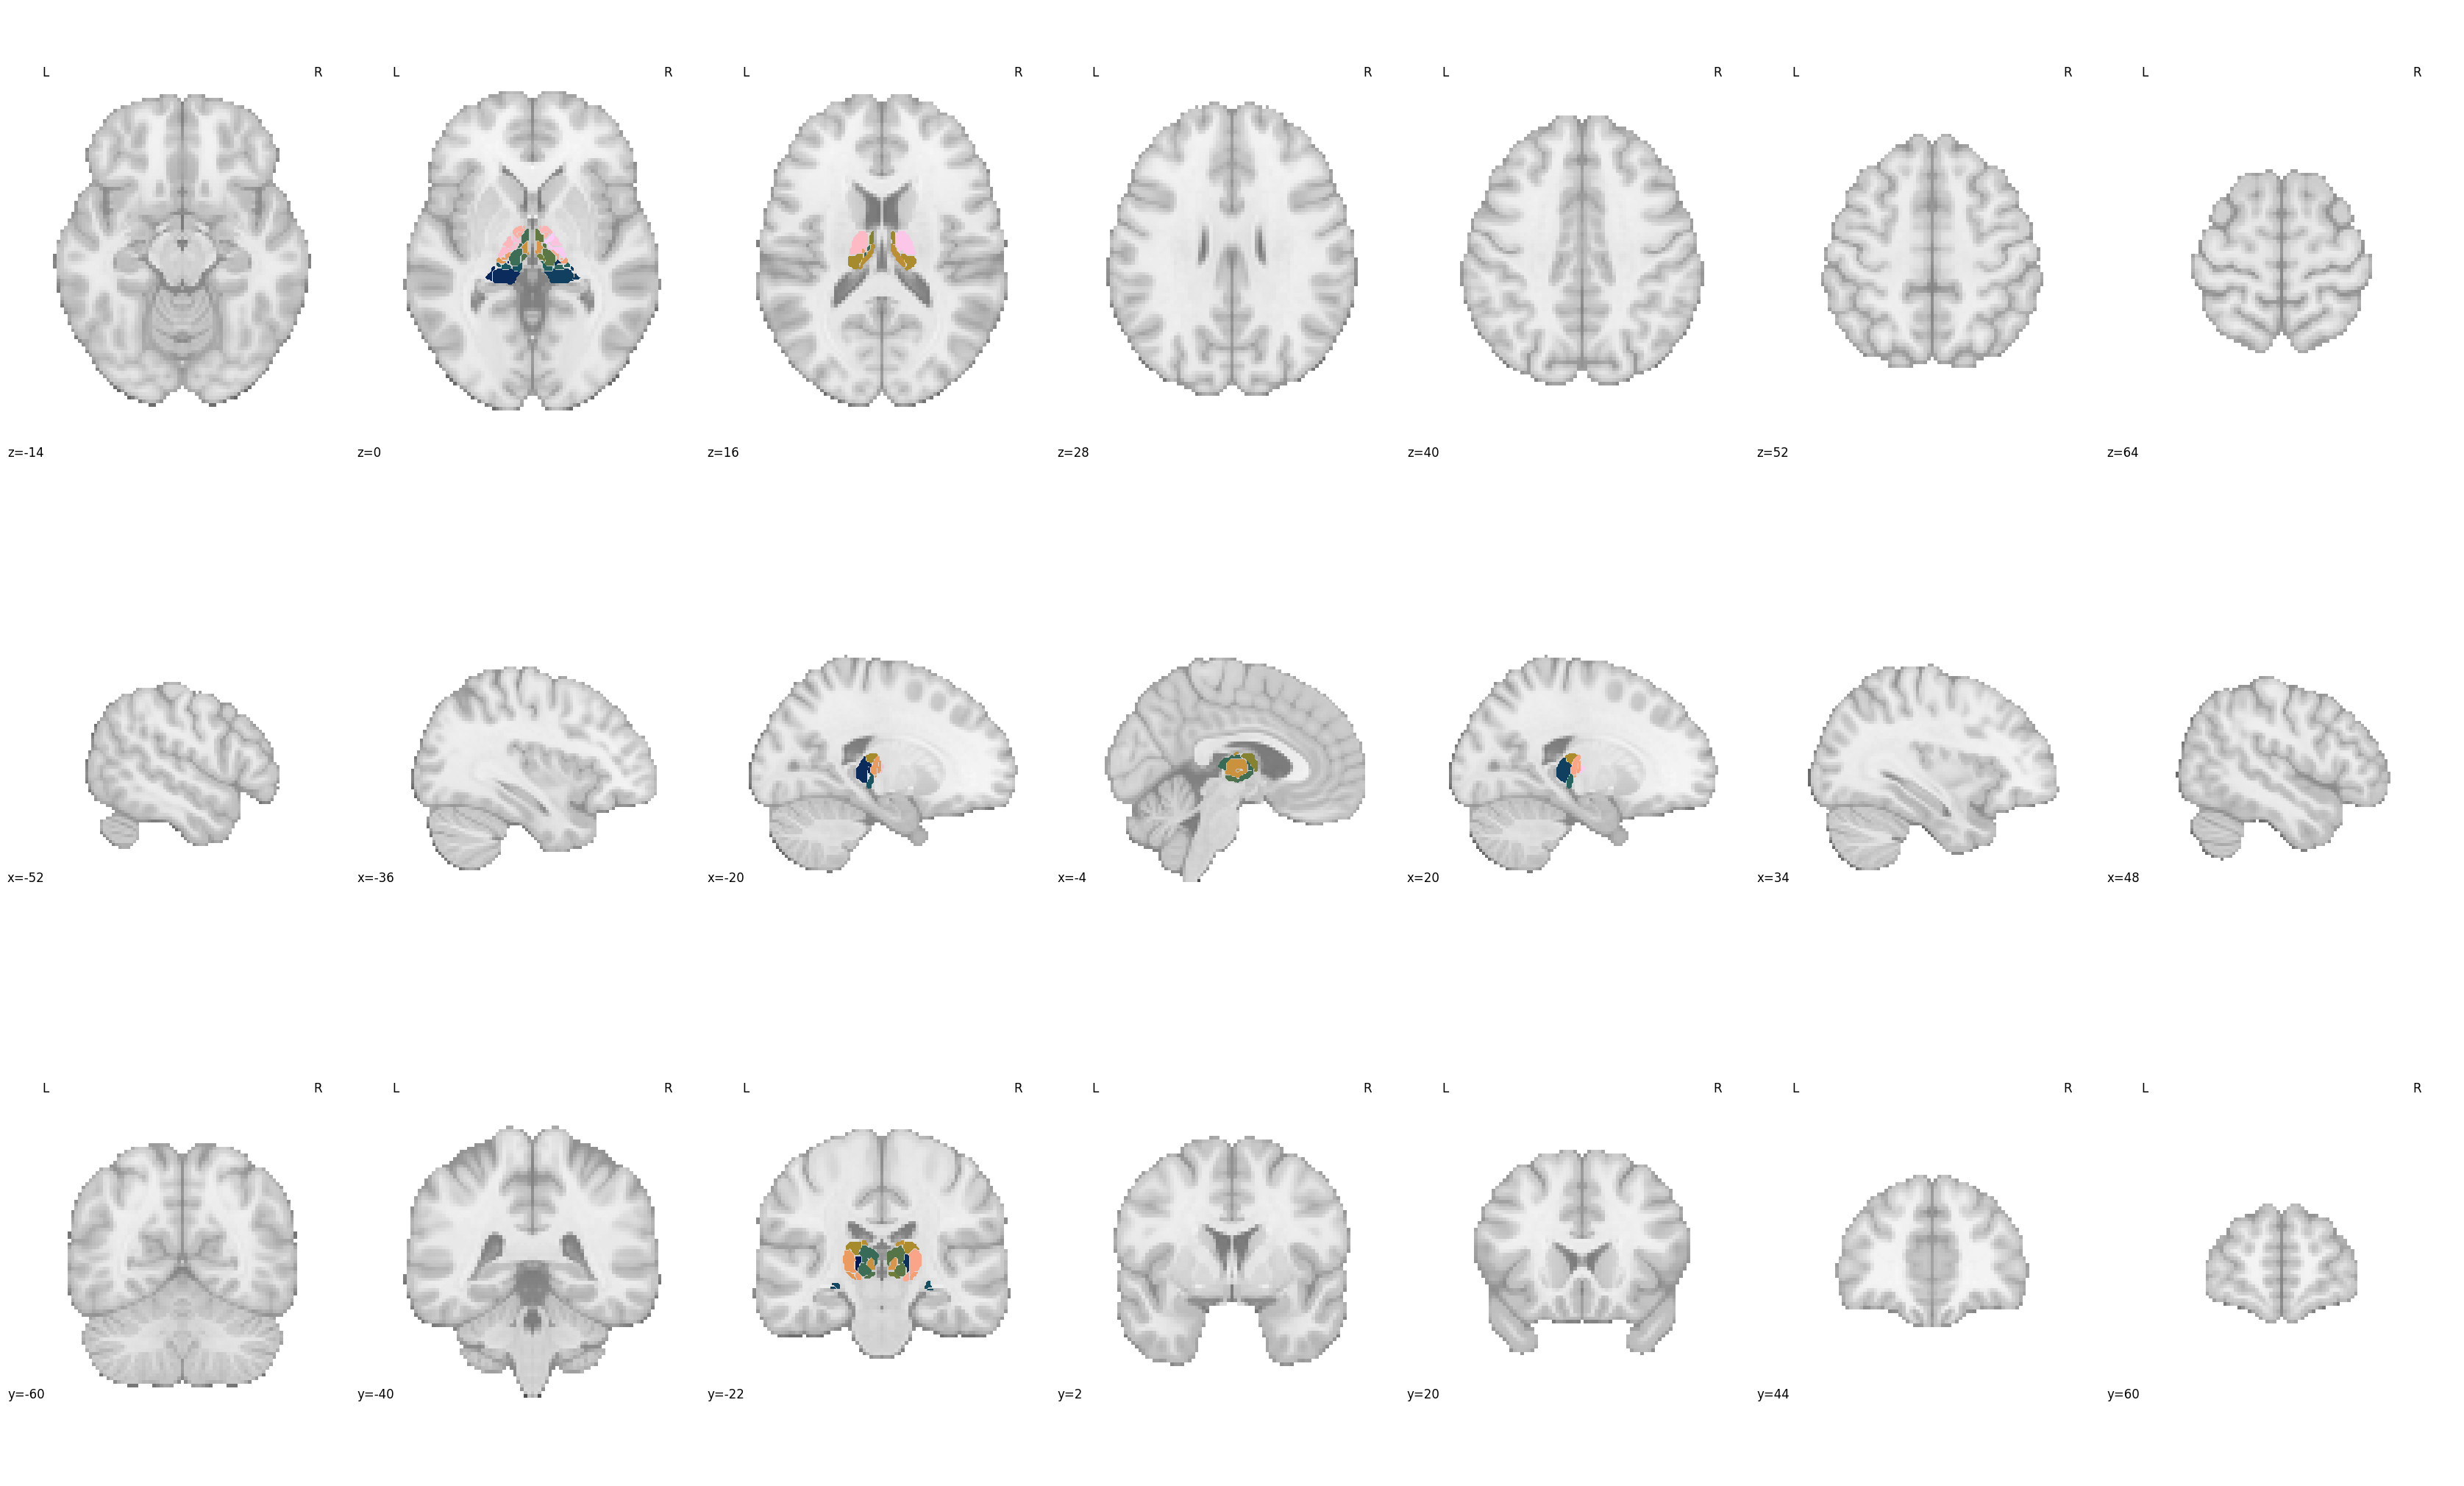

In [34]:
roi_key = 'Thalamus'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


Amygdala has 20 number of rois


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


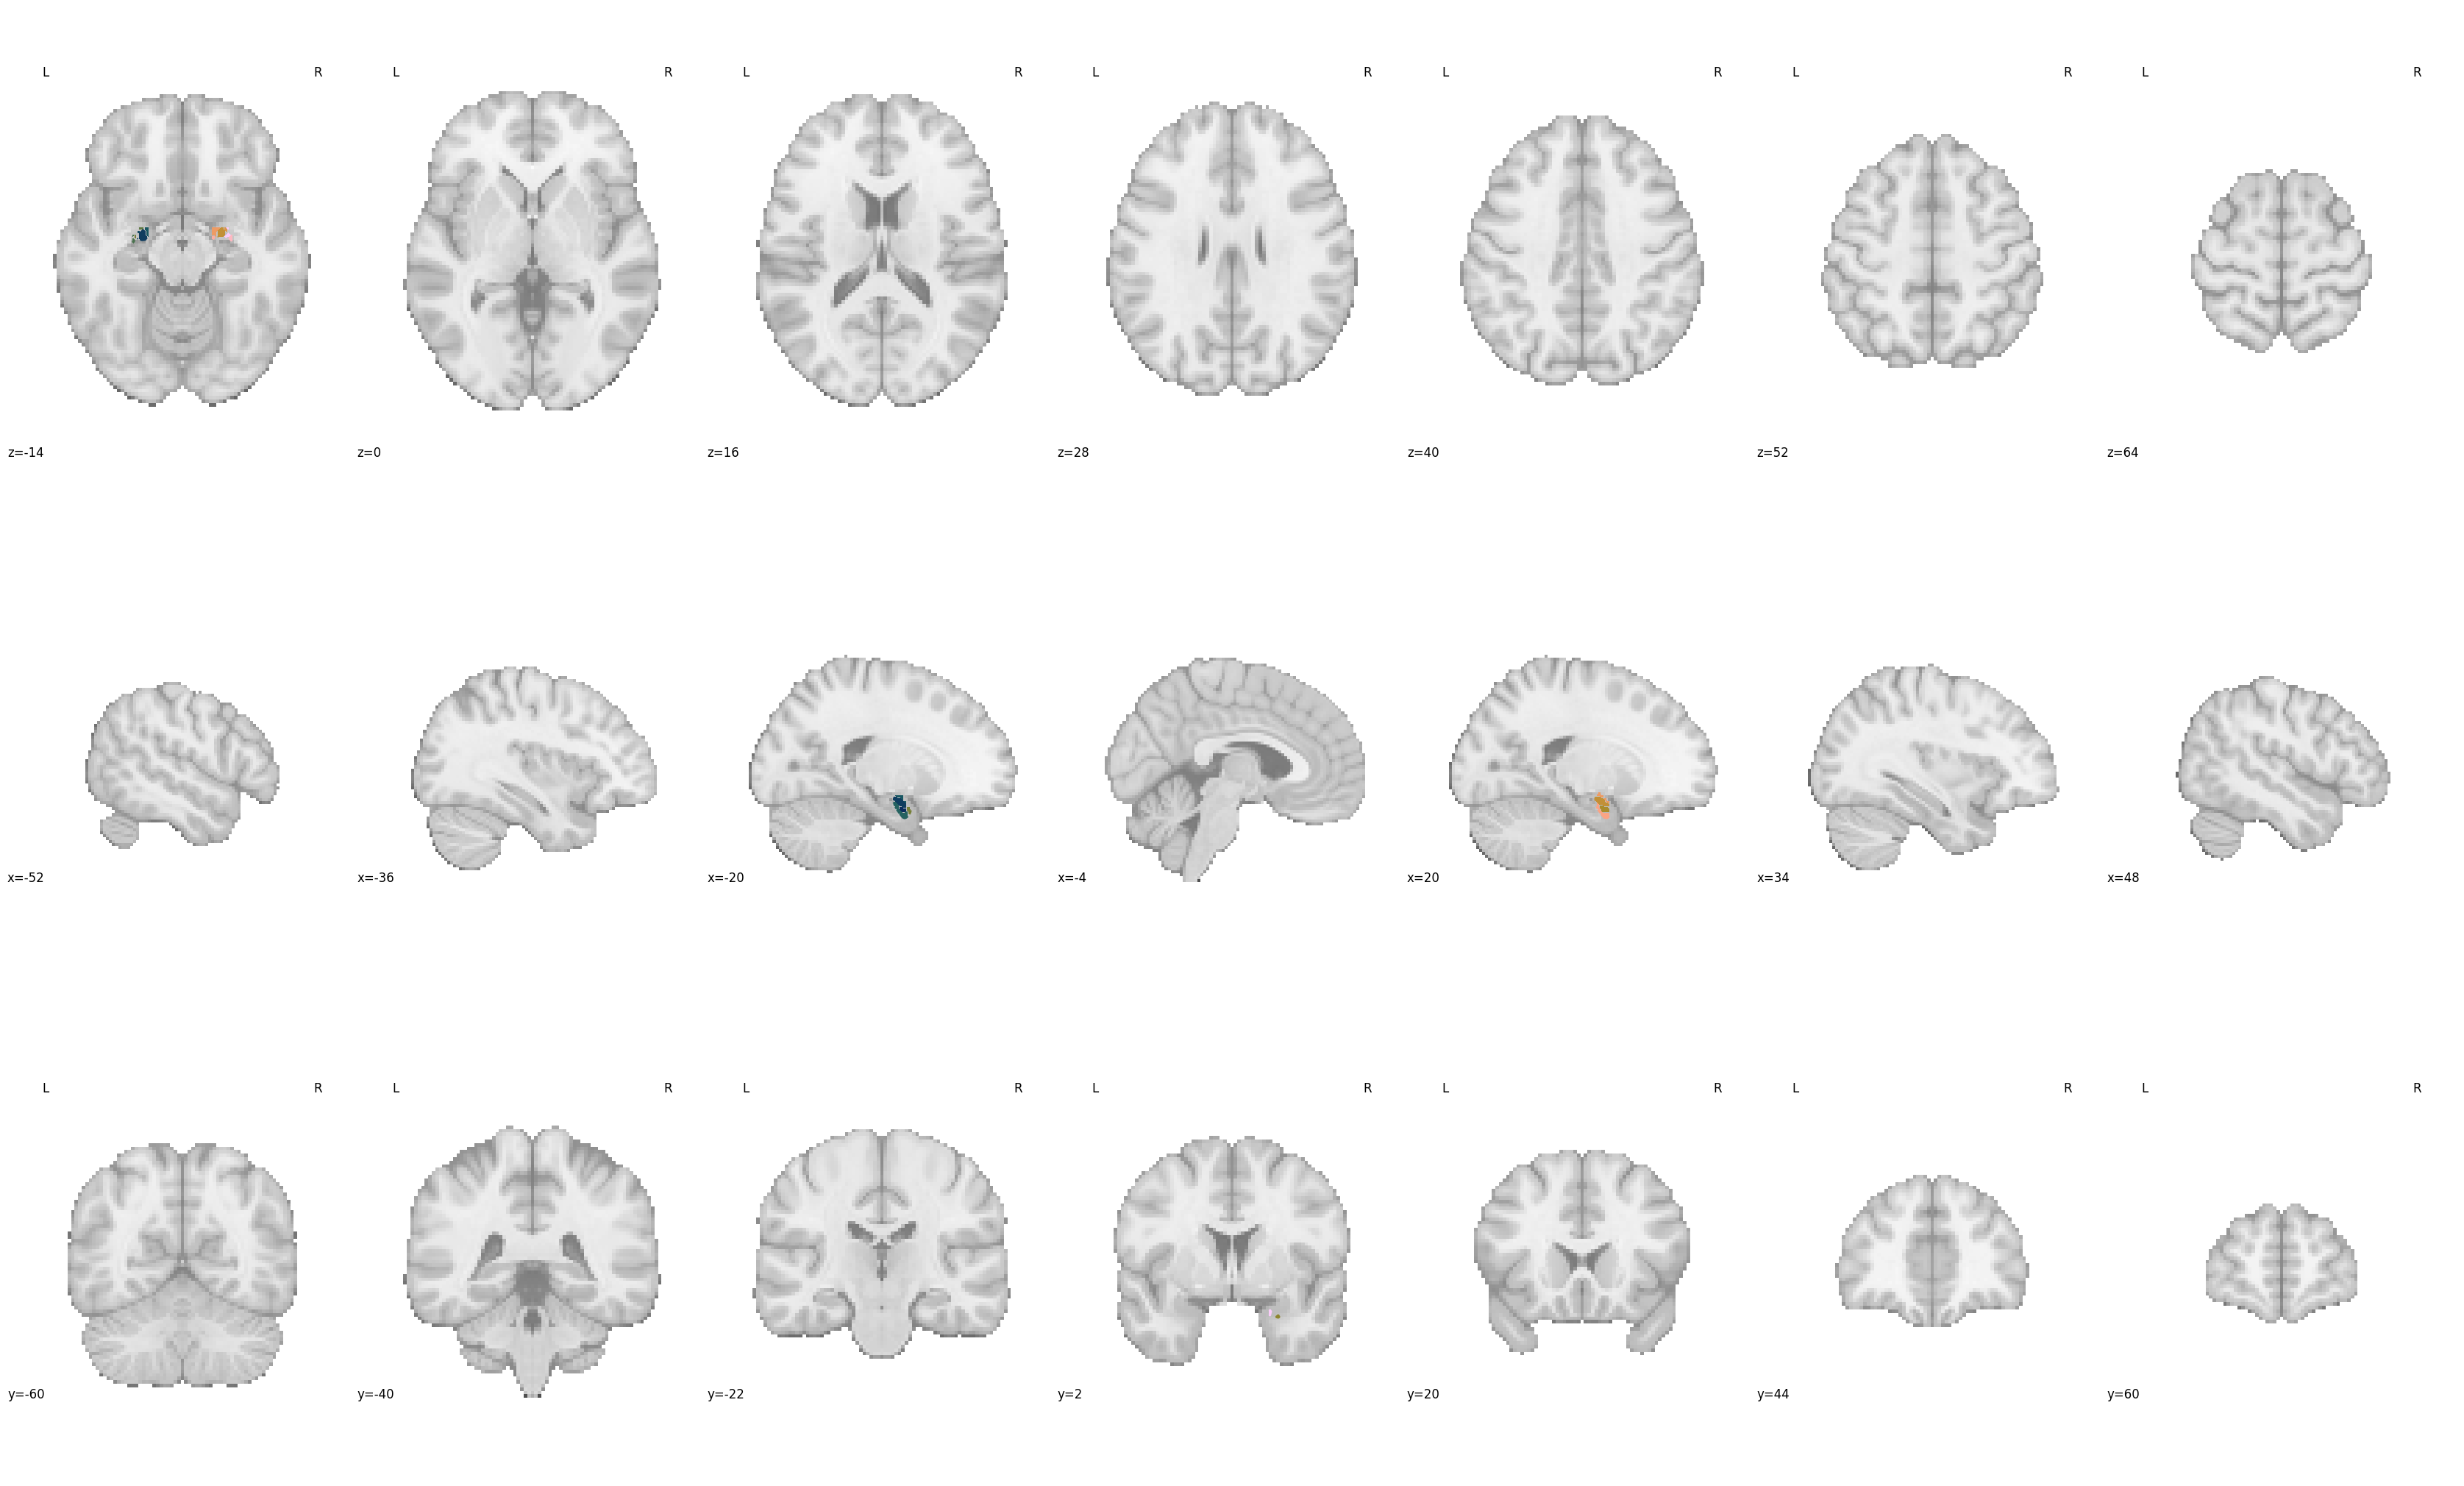

In [35]:
roi_key = 'Amygdala'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)
